<a href="https://colab.research.google.com/github/khl-hamdaoui/DataScience-IntroProject/blob/main/Weather_Forecasting_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


Weather forecasting is an application of time series modeling and prediction. Historical weather data like temperature, humidity, wind speed etc can be used to build time series forecasting models to predict future weather conditions.

# Import the required libraries


In [ ]:
# Importing essential libraries for data analysis and visualization.
# - Pandas for data manipulation and analysis.
# - NumPy for numerical operations and computations.
# - Matplotlib for creating static visualizations.
# - Seaborn for statistical data visualization with an emphasis on aesthetics.
# - Plotly Express for interactive and expressive data visualizations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Data Collection

## Acquiring Data
We importe the [dataset](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data) in CSV format directly from Kaggle.<br>
 This dataset provides data from **1st January 2013** to **24th April 2017** in the city of Delhi, **India**. The 4 parameters here are:
*   **meantemp**      :Average temperature.
*   **humidity**      :Moisture in the air.
*   **wind_speed**    :Air speed.
*   **meanpressure**  :Average atmospheric pressure.










In [ ]:
# Reading the dataset from a CSV file named "DailyDelhiClimateTrain.csv" and loading it into a Pandas DataFrame .
data = pd.read_csv("DailyDelhiClimateTrain.csv")

# Displaying the first few rows of the dataset.
print(data.head())

## Summary Statistics for the Dataset

In [ ]:
# Displaying a summary of statistical information for the dataset.
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


## Dataset Information:

In [ ]:
# Displaying essential information about the dataset's structure and data types.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


# Exploratory Data Analysis

## Mean Temperature Trend in Delhi Over the Years

In [ ]:
# Create a line plot using Plotly Express to visualize the mean temperature trends in Delhi over multiple years.
figure = px.line(data, x="date", y="meantemp", title="Mean Temperature in Delhi Over the Years")

# Display the line plot.
figure.show()

## Humidity Trends in Delhi Over the Years

In [ ]:
# Create a line plot using Plotly Express to visualize the trends in humidity levels in Delhi over multiple years.
figure = px.line(data, x="date", y="humidity", title="Humidity in Delhi Over the Years")

# Display the line plot.
figure.show()

## Wind speed Trends in Delhi Over the Years

In [ ]:
# Create a line plot using Plotly Express to visualize the variations in wind speed in Delhi across multiple years.
figure = px.line(data, x="date", y="wind_speed", title="Wind Speed in Delhi Over the Years")

# Display the line plot.
figure.show()

## Exploring the Relationship Between Temperature and Humidity

In [ ]:
# Create a scatter plot using Plotly Express to explore the relationship between humidity and mean temperature.
# Additionally, an ordinary least squares (OLS) trendline is added for visualization.
figure = px.scatter(data_frame=data, x="humidity", y="meantemp", size="meantemp", trendline="ols", title="Relationship Between Temperature and Humidity")

# Display the scatter plot.
figure.show()

## Converting Date to Datetime and Extracting Year and Month

In [ ]:
# Convert the "date" column to a datetime format with the specified format (YYYY-MM-DD).
data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")

# Create a new column "year" to store the extracted year from the "date" column.
data["year"] = data["date"].dt.year

# Create a new column "month" to store the extracted month from the "date" column.
data["month"] = data["date"].dt.month

# Display the first few rows of the updated DataFrame.
print(data.head())


        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


## Temperature Change in Delhi Over the Years

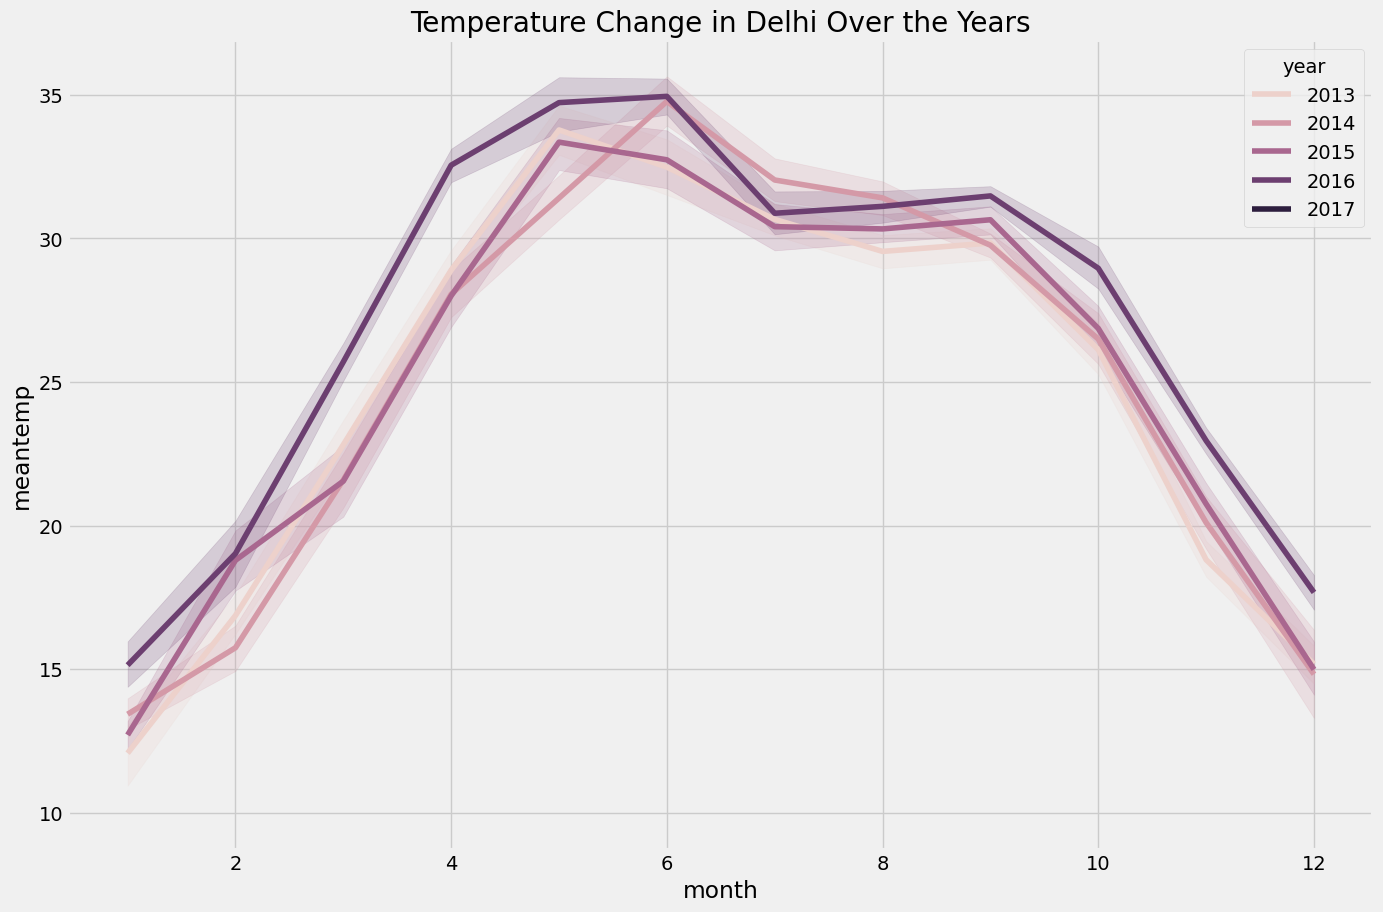

In [ ]:
# Set the plot style to "fivethirtyeight" for a specific visual style.
plt.style.use("fivethirtyeight")

# Create a figure with a specified size (15 units in width and 10 units in height).
plt.figure(figsize=(15, 10))

# Set the title for the plot.
plt.title("Temperature Change in Delhi Over the Years")

# Create a line plot using Seaborn to visualize temperature changes by month and year.
sns.lineplot(data=data, x="month", y="meantemp", hue="year")

# Display the plot.
plt.show()


# Weather foracasting

## Prophet Forecasting Setup

In [ ]:
# Install the Prophet library if not already installed
pip install prophet

In [ ]:
# Importing Prophet and related plotting functions
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
# Renaming columns for Prophet forecasting
forecasts_data = data.rename(columns={"date": "ds", "meantemp": "y"})

## Initializing and Fitting the Prophet Mode

In [ ]:
# Creating a Prophet model
model = Prophet()

# Fitting the model with the renamed data
model.fit(forecasts_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpas6rshth/bfvatf17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpas6rshth/0hf5s_ym.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20077', 'data', 'file=/tmp/tmpas6rshth/bfvatf17.json', 'init=/tmp/tmpas6rshth/0hf5s_ym.json', 'output', 'file=/tmp/tmpas6rshth/prophet_modelmgbmqxd4/prophet_model-20231005095117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Generating Future Date Frames

In [ ]:
# Creating future date frames for forecasting
forecasts = model.make_future_dataframe(periods=365)

## Generating Predictions and Plotting Results

In [ ]:
# Generating predictions using the model
predictions = model.predict(forecasts)

# Plotting the Prophet model's results using Plotly
plot_plotly(model, predictions)